In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("C:/Users/mufdu/Documents/Deep-Learning/SemEval-Task10/data/train_all_tasks.csv")
df.head()

,rewire_id,text,label_sexist,label_category,label_vector
0,sexism2022_english-7358,"Damn, this writing was pretty chaotic",not sexist,none,none
1,sexism2022_english-2367,"Yeah, and apparently a bunch of misogynistic v...",not sexist,none,none
2,sexism2022_english-3073,How the FUCK is this woman still an MP!!!???,not sexist,none,none
3,sexism2022_english-14895,Understand. Know you're right. At same time I ...,not sexist,none,none
4,sexism2022_english-4118,Surprized they didn't stop and rape some women,not sexist,none,none


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [9]:
X = df.text
tfid_vec = TfidfVectorizer().fit(X)
X_corpus =  tfid_vec.transform(X)

In [10]:
X_corpus.shape

(14000, 20964)

In [11]:
X = df.text
y = df.label_sexist
label_encoder = LabelEncoder().fit(y)
encoded_y = label_encoder.transform(y)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import f1_score

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_corpus, encoded_y , random_state =42)

In [15]:
print(X_train.shape)
print(X_test.shape)

(10500, 20964)
(3500, 20964)


**LOGISTIC REGRESSION**

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
l_model = LogisticRegression()
l_model.fit(X_train, y_train)
l_sentiment_yhat = l_model.predict(X_test)
l_sentiment_accuracy = accuracy_score(y_true = y_test, y_pred = l_sentiment_yhat)
l_sentiment_f1 = f1_score(y_true = y_test, y_pred =l_sentiment_yhat)

In [19]:
print(f"The accuracy from logistic sentiment classification: {l_sentiment_accuracy}")
print(f"with f1 score: {l_sentiment_f1}")
print(classification_report(y_true = y_test, y_pred = l_sentiment_yhat ))

The accuracy from logistic sentiment classification: 0.798
with f1 score: 0.3868169991326973
              precision    recall  f1-score   support

           0       0.80      0.98      0.88      2625
           1       0.80      0.25      0.39       875

    accuracy                           0.80      3500
   macro avg       0.80      0.62      0.63      3500
weighted avg       0.80      0.80      0.76      3500



Text(0.5, 1.0, 'Sentiment classification')

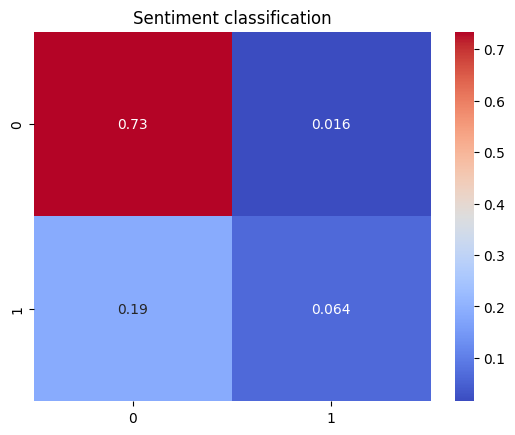

In [20]:
sns.heatmap(confusion_matrix(y_true= y_test, y_pred = l_sentiment_yhat) / len(l_sentiment_yhat), 
            annot = True, cmap ='coolwarm')
plt.title('Sentiment classification')

**Support Vector Classification SVC**

In [21]:
from sklearn.svm import SVC

In [22]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_topic_yhat = svm_model.predict(X_test)
svm_topic_accuracy = accuracy_score(y_true = y_test, y_pred = svm_topic_yhat )
svm_topic_f1 = f1_score(y_true = y_test, y_pred = svm_topic_yhat, average = 'weighted')

In [23]:
print(f"The accuracy from SVM sentiment classification: {svm_topic_accuracy}")
print(f"with f1 score: {svm_topic_f1}")
print(classification_report(y_true = y_test, y_pred = svm_topic_yhat ))

The accuracy from SVM sentiment classification: 0.806
with f1 score: 0.7631421159808185
              precision    recall  f1-score   support

           0       0.80      0.99      0.88      2625
           1       0.88      0.26      0.40       875

    accuracy                           0.81      3500
   macro avg       0.84      0.62      0.64      3500
weighted avg       0.82      0.81      0.76      3500



Text(0.5, 1.0, 'Sentiment classification')

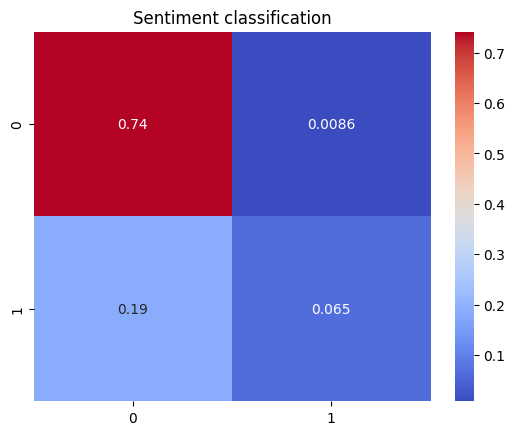

In [25]:
sns.heatmap(confusion_matrix(y_true= y_test, y_pred = svm_topic_yhat) / len(svm_topic_yhat), 
            annot = True, cmap ='coolwarm')
plt.title('Sentiment classification')

**RANDOM FOREST CLASSIFIER**

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_topic_yhat = rf_model.predict(X_test)
rf_topic_accuracy = accuracy_score(y_true = y_test, y_pred = rf_topic_yhat )
rf_topic_f1 = f1_score(y_true = y_test, y_pred = rf_topic_yhat, average = 'weighted')

In [28]:
print(f"The accuracy from SVM sentiment classification: {rf_topic_accuracy}")
print(f"with f1 score: {rf_topic_f1}")
print(classification_report(y_true = y_test, y_pred = rf_topic_yhat ))

The accuracy from SVM sentiment classification: 0.818
with f1 score: 0.7797485095121839
              precision    recall  f1-score   support

           0       0.81      0.99      0.89      2625
           1       0.93      0.29      0.45       875

    accuracy                           0.82      3500
   macro avg       0.87      0.64      0.67      3500
weighted avg       0.84      0.82      0.78      3500



Text(0.5, 1.0, 'Sentiment classification')

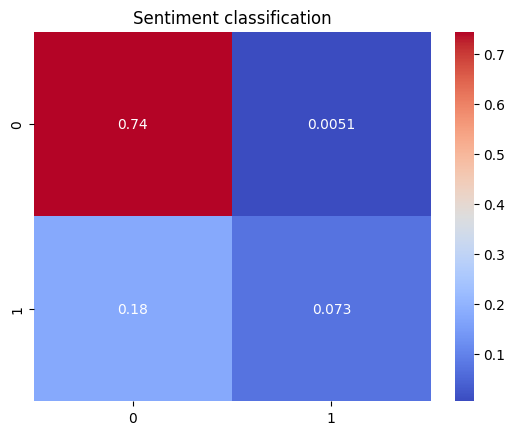

In [29]:
sns.heatmap(confusion_matrix(y_true= y_test, y_pred = rf_topic_yhat, labels=[0,1]) / len(rf_topic_yhat), 
            annot = True, cmap ='coolwarm')
plt.title('Sentiment classification')